# Problema 6, 7 y 8
## 6)
Nuestra densidad **superficial** de masa viene dada por <br>
<center> $\rho(r) = \rho_{0}\cdot e^{(-r/r_c)}$ </center> <br>
Con $r =$ distancia al origen. <br>
La masa total contenida dentro de un círculo de radio $R$ viene dada por <br>
<center> $M(R) = \int_0^{2\pi} \int_0^{R} \rho(r) \cdot r dr d\phi$ </center> <br>
<center> $M(R) = 2\pi\rho_{0} \cdot r_c[r_c - e^{-R/r_c}(r_c+R)]$ </center> <br>
Por lo que la masa total $M_T$ dada por este perfil de densidad superficial será <br>
<center> $M_T = \int_0^{2\pi} \int_0^{\infty} \rho(r) \cdot r dr d\phi$ </center> <br>
<center> $M_T = 2\pi\rho_0r_c^2$ </center> <br>
Luego, para encontrar $r_h$ numéricamente con los métodos de B, N-R y S:
<center> $M(r=r_h) = M_h = \frac{M_T}{2}$ </center> <br>
Pido <br>
<center> $M(r) - \frac{M_T}{2} = 0$ </center> <br>

#### *Por simplicidad, pediremos que $\rho_0 = r_c = 1$*

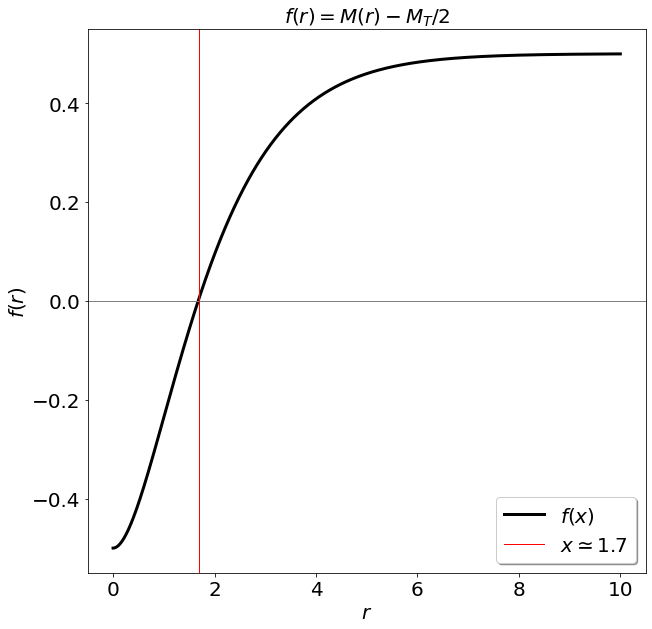

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000) #dominio que comienza en 0, termina en 2*pi, y tiene 100 pasos
y = 1 - (np.exp(-x) * (1 + x)) - 0.5

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(x)$',lw=3)
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(-1,1)
#plt.xlim(0,2)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 1.7,color='red',lw=1,label='$x \simeq 1.7$')
plt.title('$f(r) = M(r)-M_T/2$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('$r$',size=20)
plt.ylabel('$f(r)$',size=20);

##### <center> Caption: Graficamos la función a la cual le queremos encontrar las raíces.

### Inicio código

*Para B y S, pedimos que el bracket original sea $[0,10]$ y para N-R el guess inicial será $r_0 = 5$* <br>
*Para el método N-R, ya conocemos $M'(r) = \rho(r) \cdot r$*

In [16]:
#En el caso rho_0 = r_c = 1 => M_T = 2*pi

#Y la func a la que le voy a buscar las raíces la escribo como

def f(r,rho_0=1,rc=1): #La func
    M = -2*np.pi*rho_0*(rc*np.exp(-r/rc)*(rc+r) - rc**2) - np.pi*rho_0*rc**2
    return M

#Y vuelvo a definir los métodos:

#Bisección:

def bisec(xl,xu): #xl = xmin del bracket; xu = xmax del bracket
    
    i = 0 #contar el número de iteraciones
    e = abs(xu-xl) #error
        
    while e > 10**-6 and i < 1000: #el loop se corta cuando se llega a la precisión requerida o se pasa el número de iteraciones
    
        i += 1 #contando
        xm = 0.5*(xl+xu) #punto medio
        #print(xl,xm,xu,i) #para saber qué está haciendo
        if f(xl)*f(xm) < 0: #test para nuevo bracket
            xu = xm
        
        elif f(xl)*f(xm) == 0:
            print('La raíz de f(x) es',xm)
            e = 0
            break
        
        else:
            xl = xm
        
        e = abs(xu - xl) #test del error
        
    print('Bisección:\n La 1º raíz de f(x) es',xm,'con un error de',e,'tras',i,'iteraciones.\n')    
        
    return xm #fin de la func de bisección

#Antes de hacer N-R, debemos definir la derivada de M(r) ¡ = rho(r)!

def g(r,rho_0=1,rc=1): # M'
    rho = rho_0*np.exp(-r/rc)*r
    return rho

def NR(xl,xu): #xl = xmin del bracket; xu = xmax del bracket

    xi = 0.5*(xl+xu) #guess inicial
    xj = xi #espacio para guardar

    i = 0
    e = abs(xu-xl)

    while e > 10**-6 and i < 1000:
    
        i += 1 #contando
    
        xj = xi #guardamos el guess anterior
    
    #test de que cae adentro del bracket inicial:
    
        if xl < xj < xu:
            xi = xi - f(xi)/g(xi) #nuevo guess
        else:
            xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
            if f(xl)*f(xi) < 0: 
                xu = xi
            elif f(xl)*f(xi) == 0:
                print('La raíz de f(x) es',xm)
                e = 0
                break
            else:
                xl = xi 
        
        e = abs(xj-xi) #error
    
    print('N-R:\n La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.\n')
    
    return xi #fin de la func de N-R

def sec(xl,xu): #xl = xmin del bracket; xu = xmax del bracket
    
    global i
    global e
    global xi #para poder callear a las variables afuera de la func

    xi = 0.5*(xl+xu) #guess inicial
    xj = xu #espacio para guardar

    i = 0
    e = abs(xu-xl)

    while e > 10**-6 and i < 1000:
        i += 1 #contando
    
        if xl <= xj <= xu: #test para que caiga dentro del bracket
        
            g = (f(xi)-f(xj))/(xi-xj) #def la derivada f' (antes de cambiar xj para tener 2 pts distintos)
    
            xj = xi #guardo el paso anterior
            xi = xi - f(xi)/g #nuevo guess
            
            e = abs(xj-xi) #error
    
        else: #si cae fuera, bisección
            print('Se usará Bisección',i)
            xi = 0.5*(xl+xu) #punto medio
        #test para nuevo bracket
            if f(xl)*f(xi) < 0: 
                e = abs(xl-xi) #error
                xu = xi
            elif f(xl)*f(xi) == 0:
                print('La raíz de f(x) es',xm)
                e = 0
                break
            else:
                e = abs(xu-xi) #error
                xl = xi
    
        e = abs(xj-xi) #error
    
    print('Secante:\n La 1º raíz de f(x) es',xi,'con un error de',e,'tras',i,'iteraciones.\n')
    
    return xi #fin de la func de la secante

bisec(0,10)
NR(0,10)
sec(0,5); #Cambiamos el bracket incial

Bisección:
 La 1º raíz de f(x) es 1.6783469915390015 con un error de 5.960464477539062e-07 tras 24 iteraciones.

N-R:
 La 1º raíz de f(x) es 1.6783469915390015 con un error de 5.960464477539062e-07 tras 25 iteraciones.

Secante:
 La 1º raíz de f(x) es 1.678346990079717 con un error de 8.882800621723419e-07 tras 6 iteraciones.



### Fin código
Comprobemos que efectivamente encierra la mitad de la masa total: (para $\rho_0 = r_c = 1$) <br>
<center> $M_T = 2\pi$ </center>
<center> $M(r_h = 1.6783469) = 2\pi[1 - e^{-r_h}(1+r_h)]$ </center> <br>

In [24]:
r_h = 1.6783469
M_h = 2*np.pi*(1-np.exp(-r_h)*(1+r_h))
print(f'La masa encerrada hasta r_h es {M_h}')
print(f'¿Es M_h = pi? {np.isclose(M_h,np.pi)}')

La masa encerrada hasta r_h es 3.1415924763800107
¿Es M_h = pi? True


Y se cumple <br>
<center> $M(r_h) = \pi$ </center> <br>

Resulta que para el bracket original ($[0,10]$) la secante es mal método (la primera iteración me devuleve un guess afuera del bracket original $\Rightarrow$ tengo que hacer Bisección). Luego, sabiendo ya la raiz por los otros métodos, uso brackets más pequeños (y por eso son mucho menos las iteraciones). ¡También vemos que N-R se tarda más que Bisección! <br>
Revisando la forma de $M(r) - M_T/2$, vemos que $r>6 \Rightarrow M'(r) \rightarrow 0$ <br>
Lo cual explica este comportamiento para los métodos que involucran derivadas.

## 7)
Ahora tenemos una densidad **volumétrica** de masa dada por <br>
<center> $\rho(r) = \rho_{0}(\frac{r_s}{r}) \frac{1}{{1+(r/r_s)}^2}$ </center> <br>
Con $r =$ distancia al origen. <br>
La masa total contenida dentro de una esfera de radio $R$ viene dada por <br>
<center> $M(R) = \int_0^{\pi} \int_0^{2\pi} \int_0^{R} \rho(r) \cdot r^2 sen(\theta) dr d\phi d\theta$ </center> <br>
<center> $M(R) = 4\pi\rho_{0} \cdot r_s^{3}[\frac{1}{1+R/r_s}+ln(r_s+R) - ln(r_s) - 1]$ </center> <br>
Esto es, $\lim_{R\to\infty} M(R) =\infty$ ¡Diverge! Entonces definamos <br> 
<center> $M_T = M(R = 100 \cdot r_s) = 4\pi\rho_0r_s^3 \cdot (ln(101)-\frac{100}{101} )$ </center> <br>
Luego, para encontrar $r_h$ numéricamente con los métodos de B, N-R y S:
<center> $M(R=r_h) = M_h = \frac{M_T}{2}$ </center> <br>
Pido <br>
<center> $M(R) - \frac{M_T}{2} = 0$ </center> <br>

#### *Por simplicidad, pediremos que $\rho_0 = r_s = 1$*

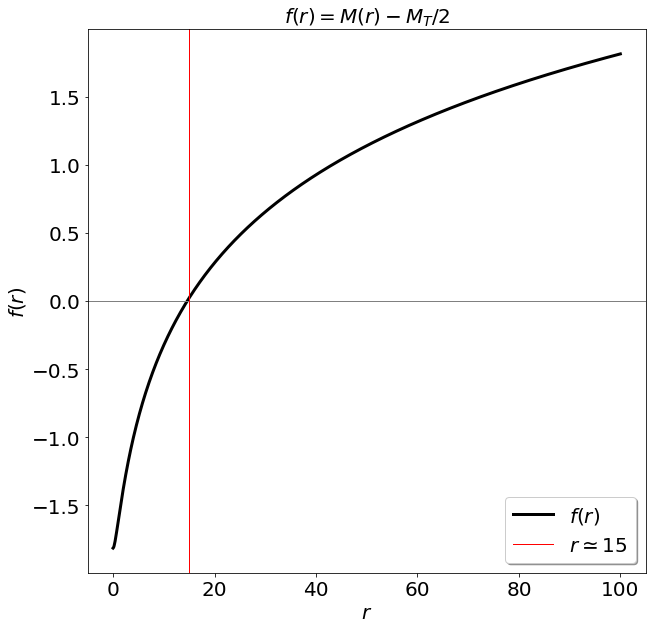

In [96]:
x = np.linspace(0, 100, 1000)
y = ((1/(1+x)) + np.log(1+x) - np.log(1) - 1) - (np.log(101)-(100/101))/2

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(r)$',lw=3)
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 15,color='red',lw=1,label='$r \simeq 15$')
plt.title('$f(r) = M(r)-M_T/2$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('$r$',size=20)
plt.ylabel('$f(r)$',size=20);

##### <center> Caption: Graficamos la función a la cual le queremos encontrar las raíces.

### Inicio código

*Para B y S, pedimos que el bracket original sea $[5,100]$ y para N-R el guess inicial será $r_0 = 45$* <br>
*Para el método N-R, ya conocemos $M'(r) = \rho(r) \cdot r^2$*

In [100]:
def f(r,rs=1): #M(r) - M(100*r_s)/2. Escribimos la forma entera (se cancela el factor 4·pi·rho0·rs^3 : ¡No depende de rho_0!)
    M = (rs/(rs+r) + np.log(rs + r) - np.log(rs) - 1) - (np.log(101)-(100/101))/2
    return M

def g(r,rho_0=1,rs=1): # M'(r) = rho(r)*r^2
    rho = rho_0*(rs/r)*(1+(r/rs))**(-2) * (r**2)
    return rho

bisec(5,100)
NR(5,100)
sec(12,16); #Nuevamente, la Secante fue un mal método

Bisección:
 La 1º raíz de f(x) es 14.618968032300472 con un error de 7.078051567077637e-07 tras 27 iteraciones.

N-R:
 La 1º raíz de f(x) es 14.618968032300472 con un error de 7.078051567077637e-07 tras 28 iteraciones.

Secante:
 La 1º raíz de f(x) es 14.618967395414527 con un error de 3.549130056512695e-07 tras 4 iteraciones.



### Fin código

In [130]:
M_100rs = 4*np.pi*(np.log(101)-(100/101)) #valor analítico
r_h = 14.6189 #solucióbn numérica
M_h = 4*np.pi*(1/(1+r_h)+np.log(1+r_h)-np.log(1)-1)

print(f'La masa encerrada hasta r_h es {M_h}')
print(f'¿Es M_h = M_100rs/2? {np.isclose(M_h,M_100rs/2)}')
print(f'M_100rs/2 = {M_100rs/2}')

La masa encerrada hasta r_h es 22.77663111862256
¿Es M_h = M_100rs/2? True
M_100rs/2 = 22.776681870617104


### Conclusión

¿It's good?

## 8)

Sabemos que la velocidad circular de una distrib de masa viene dada por <br>
<center> $V(r) = \sqrt{\frac{GM_{<}(r)}{r}}$ </center> <br>
Y, en este caso, <br>
<center> $M(R) = \int_0^{\pi} \int_0^{2\pi} \int_0^{R} \rho(r) \cdot r^2 sen(\theta) dr d\phi d\theta$ </center> <br>
<center> $M(R) = 4\pi\rho_{0} \cdot r_s^{3}[\frac{1}{1+R/r_s}+ln(r_s+R) - ln(r_s) - 1]$ </center> <br>
Donde <br>
<center> $\rho(r) = \rho_{0}(\frac{r_s}{r}) \frac{1}{{1+(r/r_s)}^2}$ </center> <br>
Luego, si buscamos el $r$ donde ocurra el máximo de la velocidad, estamos pidiendo:
<center> $r_{max}$ : $V'(r=r_{max}) = 0$ </center> <br>
Entonces, calculemos $V'(r)$: <br>
<center> $V'(r) = (u^{1/2})' = \frac{1}{2} u^{-1/2} du$ ; con $u=\frac{GM(r)}{r}$ </center> <br>
<center> $V'(r) = \frac{1}{2}G^{1/2} \cdot (\frac{M'(r)}{\sqrt{rM(r)}}-\sqrt{\frac{M(r)}{r^3}})$ </center> <br>
Es decir, para encontrar el máximo $(V'(r_{max}) = 0)$ se debe cumplir <br>
<center> $\frac{M'(r)}{M(r)} = \frac{1}{r}$ </center> <br>
Debo buscar la raíz de <br>
<center> $f(x) = \frac{M'(r)}{M(r)} - \frac{1}{r}$ </center> <br>
Dónde <br>
<center> $M'(r) = \rho(r) \cdot r^2$ </center> <br>
¡Apliquemos los métodos que conocemos! <br>

#### *Por simplicidad, pediremos que $\rho_0 = r_s = G = 1$*

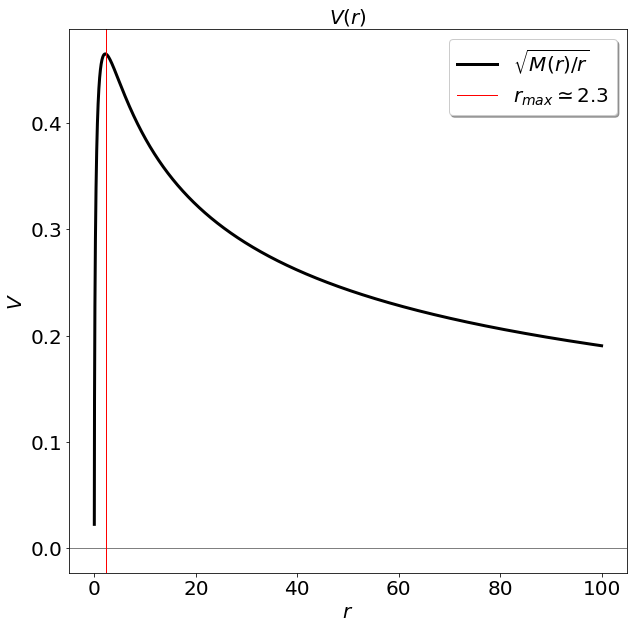

In [116]:
#V(r)

x = np.linspace(0.001, 100, 10000)
y = np.sqrt((1/(1+x)+np.log(1+x)-np.log(1)-1)/x)

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$\sqrt{M(r)/r}$',lw=3)
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 2.3,color='red',lw=1,label='$r_{max} \simeq 2.3$')
plt.title('$V(r)$',size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('$r$',size=20)
plt.ylabel('$V$',size=20);

##### <center> Caption: Graficamos $V(r)$, función a la cuál le queremos encontrar el *máximo*.

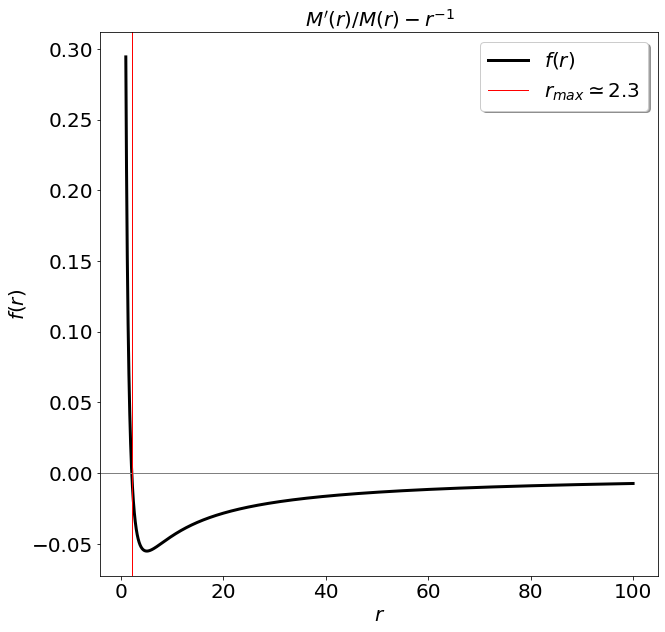

In [124]:
#f(r) para implementar B, N-R y S

x = np.linspace(1, 100, 10000)
y = (x*((1+x)**(-2)))/(1/(1+x)+np.log(1+x)-np.log(1)-1) - 1/x

plt.figure(figsize=(10,10))
plt.plot(x,y,'k',label='$f(r)$',lw=3)
plt.grid(False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axhline(y = 0,color='gray',lw=1)
plt.axvline(x = 2.3,color='red',lw=1,label='$r_{max} \simeq 2.3$')
plt.title("$M'(r)/M(r) - r^{-1}$",size=20)
plt.legend(fontsize=20,shadow=True)
plt.xlabel('$r$',size=20)
plt.ylabel('$f(r)$',size=20);

##### <center> Caption: Graficamos la función a la cual le queremos encontrar las raíces. </center>

### Cálculo auxiliar

*Para B y S, pedimos que el bracket original sea $[0.01,20]$ y para N-R el guess inicial será $r_0 = 10$* <br>
Para el método N-R necesitamos $f'(r)$: <br>
<center> $f(x) = \frac{M'(r)}{M(r)} - \frac{1}{r}$ </center> <br>
<center> $f'(x) = \frac{M''M - M'^2}{M^2} + \frac{1}{r^2}$ </center> <br>
Ya conocemos $M(r)$, $M'(r) = \rho(r) \cdot r^2$, pero nos falta $M''(r)$ <br>
<center> $M'' = (\rho(r) \cdot r^2)' = (\frac{r}{1+r^2})'$ </center> <br>
<center> $M'' = \frac{1-r^2}{(1+r^2)^2}$ </center> <br>
Ahora si, calculemos este $r_{max}$:

### Inicio código

In [128]:
def f(x):
    M = (x*((1+x)**(-2)))/(1/(1+x)+np.log(1+x)-np.log(1)-1) - 1/x
    return M

def g(x): # M'(r) = rho(r)*r^2 ; M'' = 1-r^2 / (1+r^2)^2
    m = (1/(1+x)+np.log(1+x)-np.log(1)-1) #M(r)
    m1 = (x*((1+x)**(-2))) #M'(r)
    m2 = (1-x**2)*((1+x**2)**-2) #M''(r)
    rho = (m2*m - m1**2)/m**2 + x**-2
    return rho

bisec(0.01,20)
NR(0.01,20)
sec(1,4); #Nuevamente, la Secante fue un mal método

Bisección:
 La 1º raíz de f(x) es 2.1625814417004583 con un error de 5.957484243701572e-07 tras 25 iteraciones.

N-R:
 La 1º raíz de f(x) es 2.1625814417004583 con un error de 5.957484243701572e-07 tras 26 iteraciones.

Secante:
 La 1º raíz de f(x) es 2.162581587064612 con un error de 7.038680749360537e-10 tras 8 iteraciones.



### Fin código

Corroboremos, evaluando en $V'(r = r_{max})$

In [142]:
x = 2.1625814
V = (x*((1+x)**(-2)))/(1/(1+x)+np.log(1+x)-np.log(1)-1) - 1/x
print(f'r_max = {x}')
print(f"V'(r=r_max) = {V}")
print(f"¿Es V'_max = 0? {np.isclose(V,0,atol=1e-7)}")

r_max = 2.1625814
V'(r=r_max) = 1.4703759543266415e-08
¿Es V'_max = 0? True


#### *Disclaimer: Recordar que usamos $\rho_0 = r_s = r_c = G = 1$ para todo lo gráfico y numérico anterior*